In [1]:
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

from ksfdtw.distance_measures import nearest_neighbor_interpolation

In [3]:
np.random.seed(0)
q = np.cumsum(np.random.rand(20) * 2 - 1 + np.sin(np.linspace(0, 2 * np.pi, 20)))
c = np.cumsum(np.random.rand(40) * 2 - 1 + np.sin(np.linspace(0, 2 * np.pi, 40)))

In [4]:
q_scaled = nearest_neighbor_interpolation(q, len(c))

/ssddata/data/cyuab/miniconda3/envs/ksfdtw/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/ssddata/data/cyuab/miniconda3/envs/ksfdtw/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


dtw_sakoechiba: 19.420028442969258
dtw_itakura: 21.684871305883114


/ssddata/data/cyuab/miniconda3/envs/ksfdtw/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/ssddata/data/cyuab/miniconda3/envs/ksfdtw/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


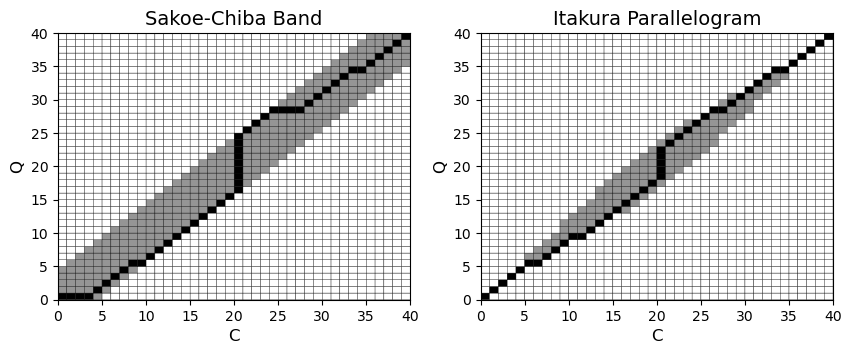

In [5]:
np.random.seed(0)
q = np.cumsum(np.random.rand(20) * 2 - 1 + np.sin(np.linspace(0, 2 * np.pi, 20)))
c = np.cumsum(np.random.rand(40) * 2 - 1 + np.sin(np.linspace(0, 2 * np.pi, 40)))
x = q_scaled[:50]
y = c[:50]
# x = np.array([1, 2, 3, 4])
# y = np.array([5, 6, 6, 7, 8, 8, 8])

# https://pyts.readthedocs.io/en/stable/auto_examples/metrics/plot_dtw.html
# Author: Johann Faouzi <johann.faouzi@gmail.com>
# License: BSD-3-Clause

import numpy as np
import matplotlib.pyplot as plt
from pyts.datasets import load_gunpoint
from pyts.metrics import dtw, itakura_parallelogram, sakoe_chiba_band
from pyts.metrics.dtw import (
    cost_matrix,
    accumulated_cost_matrix,
    _return_path,
    _blurred_path_region,
)

# Parameters
# X, _, _, _ = load_gunpoint(return_X_y=True)
# x, y = X[0], X[1]
# To compare time series of different lengths, we remove some observations
# mask = np.ones(x.size)
# mask[::5] = 0
# y = y[mask.astype(bool)]
n_timestamps_1, n_timestamps_2 = x.size, y.size

plt.figure(figsize=(10, 8))
timestamps_1 = np.arange(n_timestamps_1 + 1)
timestamps_2 = np.arange(n_timestamps_2 + 1)

# Dynamic Time Warping: sakoechiba
# window_size = 0.1
window_size = 0.1

dtw_sakoechiba, path_sakoechiba = dtw(
    x,
    y,
    dist="square",
    method="sakoechiba",
    options={"window_size": window_size},
    return_path=True,
)
band = sakoe_chiba_band(n_timestamps_1, n_timestamps_2, window_size=window_size)
matrix_sakoechiba = np.zeros((n_timestamps_1, n_timestamps_2))
for i in range(n_timestamps_1):
    matrix_sakoechiba[i, np.arange(*band[:, i])] = 0.5
matrix_sakoechiba[tuple(path_sakoechiba)] = 1.0

plt.subplot(2, 2, 1)
plt.pcolor(
    timestamps_1, timestamps_2, matrix_sakoechiba.T, edgecolors="k", cmap="Greys"
)
plt.xlabel("C", fontsize=12)
plt.ylabel("Q", fontsize=12)
plt.title("Sakoe-Chiba Band", fontsize=14)
print("dtw_sakoechiba:", dtw_sakoechiba)

# Dynamic Time Warping: itakura
slope = 1.2
dtw_itakura, path_itakura = dtw(
    x,
    y,
    dist="square",
    method="itakura",
    options={"max_slope": slope},
    return_path=True,
)
parallelogram = itakura_parallelogram(n_timestamps_1, n_timestamps_2, max_slope=slope)
matrix_itakura = np.zeros((n_timestamps_1, n_timestamps_2))
for i in range(n_timestamps_1):
    matrix_itakura[i, np.arange(*parallelogram[:, i])] = 0.5
matrix_itakura[tuple(path_itakura)] = 1.0
plt.subplot(2, 2, 2)
plt.pcolor(timestamps_1, timestamps_2, matrix_itakura.T, edgecolors="k", cmap="Greys")
plt.xlabel("C", fontsize=12)
plt.ylabel("Q", fontsize=12)
plt.title("Itakura Parallelogram", fontsize=14)
print("dtw_itakura:", dtw_itakura)

# plt.suptitle("Dynamic Time Warping", y=0.995, fontsize=17)
plt.subplots_adjust(top=0.91, hspace=0.4)
# plt.grid(False)
plt.savefig("../figures/dtw-matrix.pdf", format="pdf", bbox_inches="tight")
plt.show()